In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [125]:
patients_data = pd.read_csv("../inputData/patients.csv")
features_to_keep = ['Id', 'BIRTHDATE', 'MARITAL', 'RACE', 'GENDER', 'CITY']
patients_data = patients_data[features_to_keep]
patients_data.head(10)

,Id,BIRTHDATE,MARITAL,RACE,GENDER,CITY
0,92a8c64e-8cd4-fe5d-ba9a-7da402646cf0,1980-01-07,S,white,F,Westfield
1,b0e16fc9-ba5a-7fe2-47f8-b0ed12cf0814,1975-07-19,M,white,F,Malden
2,4bdf7658-6cc6-fa39-1265-c38365326997,1983-06-25,M,white,M,Grafton
3,f6e97f3f-40c3-940b-8432-7b012927ae3c,1995-01-25,NaN,white,M,Boston
4,08d98ab4-4d82-e7dc-bfd3-00ad3ba43890,1956-09-11,M,white,F,Sunderland
5,98a17296-99b5-7bda-d231-f4d0b7c1685d,2009-01-14,NaN,white,F,Attleboro
6,a9614040-8dae-1a01-3444-5107294a0302,2003-10-19,NaN,white,F,Taunton
7,e83ac060-4e23-0cf2-48d3-6c139699357b,2009-07-04,NaN,white,F,Boston
8,ad36dd38-b43d-40a4-5538-de92e14dce66,1996-08-31,NaN,white,F,Plymouth
9,e6b96f46-48e4-df8b-db26-85654ebd0a0c,2009-05-07,NaN,white,M,Worcester


In [116]:
print("There are " + str(len(patients_data)) + " patients in this dataset.")

There are 1046 patients in this dataset.


## Analysing Data

<AxesSubplot:xlabel='RACE', ylabel='count'>

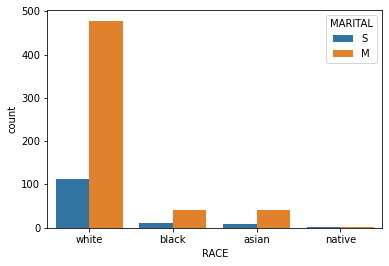

In [117]:
sns.countplot(x="RACE", hue="MARITAL", data=patients_data)

In [118]:
n = len(pd.unique(patients_data['CITY']))
print(n)

259


<AxesSubplot:>

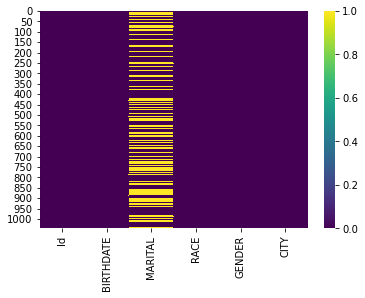

In [119]:
patients_data.isnull().sum()
sns.heatmap(patients_data.isnull(), cmap="viridis")

<AxesSubplot:xlabel='CITY', ylabel='count'>

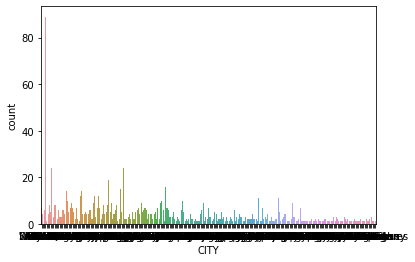

In [122]:
sns.countplot(x="CITY", data = patients_data)

## Impute data

In [126]:
patients_data["MARITAL"].fillna('S', inplace=True)
patients_data.head(10)

,Id,BIRTHDATE,MARITAL,RACE,GENDER,CITY
0,92a8c64e-8cd4-fe5d-ba9a-7da402646cf0,1980-01-07,S,white,F,Westfield
1,b0e16fc9-ba5a-7fe2-47f8-b0ed12cf0814,1975-07-19,M,white,F,Malden
2,4bdf7658-6cc6-fa39-1265-c38365326997,1983-06-25,M,white,M,Grafton
3,f6e97f3f-40c3-940b-8432-7b012927ae3c,1995-01-25,S,white,M,Boston
4,08d98ab4-4d82-e7dc-bfd3-00ad3ba43890,1956-09-11,M,white,F,Sunderland
5,98a17296-99b5-7bda-d231-f4d0b7c1685d,2009-01-14,S,white,F,Attleboro
6,a9614040-8dae-1a01-3444-5107294a0302,2003-10-19,S,white,F,Taunton
7,e83ac060-4e23-0cf2-48d3-6c139699357b,2009-07-04,S,white,F,Boston
8,ad36dd38-b43d-40a4-5538-de92e14dce66,1996-08-31,S,white,F,Plymouth
9,e6b96f46-48e4-df8b-db26-85654ebd0a0c,2009-05-07,S,white,M,Worcester


# Transform Data

In [127]:
def getAge(date):
    if isinstance(date, int):
        return date
    curryear = datetime.datetime.now().year
    birthyear = datetime.datetime.strptime(date, '%Y-%m-%d').year
    return curryear-birthyear

def isMarried(status):
    if status == "S":
        return 0
    elif status == "M":
        return 1
    else:
        return status

def isMale(gender):
    if gender == "F":
        return 0
    elif gender == "M":
        return 1
    else:
        return gender
patients_data["BIRTHDATE"] = patients_data["BIRTHDATE"].apply(getAge)
patients_data["MARITAL"] = patients_data["MARITAL"].apply(isMarried)
patients_data["GENDER"] = patients_data["GENDER"].apply(isMale)
patients_data.rename({'BIRTHDATE': 'AGE', 'MARITAL': 'MARRIED', 'GENDER': 'MALE'}, axis=1, inplace=True)
b
patients_data.head(10)

,Id,AGE,MARRIED,MALE
0,92a8c64e-8cd4-fe5d-ba9a-7da402646cf0,41,0,0
1,b0e16fc9-ba5a-7fe2-47f8-b0ed12cf0814,46,1,0
2,4bdf7658-6cc6-fa39-1265-c38365326997,38,1,1
3,f6e97f3f-40c3-940b-8432-7b012927ae3c,26,0,1
4,08d98ab4-4d82-e7dc-bfd3-00ad3ba43890,65,1,0
5,98a17296-99b5-7bda-d231-f4d0b7c1685d,12,0,0
6,a9614040-8dae-1a01-3444-5107294a0302,18,0,0
7,e83ac060-4e23-0cf2-48d3-6c139699357b,12,0,0
8,ad36dd38-b43d-40a4-5538-de92e14dce66,25,0,0
9,e6b96f46-48e4-df8b-db26-85654ebd0a0c,12,0,1


In [128]:
patients_data

,Id,AGE,MARRIED,MALE
0,92a8c64e-8cd4-fe5d-ba9a-7da402646cf0,41,0,0
1,b0e16fc9-ba5a-7fe2-47f8-b0ed12cf0814,46,1,0
2,4bdf7658-6cc6-fa39-1265-c38365326997,38,1,1
3,f6e97f3f-40c3-940b-8432-7b012927ae3c,26,0,1
4,08d98ab4-4d82-e7dc-bfd3-00ad3ba43890,65,1,0
...,...,...,...,...
1041,35c15b8d-997e-b2db-c175-926ebd0f27e5,21,0,0
1042,82e45b1b-ccfc-1401-5239-1dfb70ab5217,45,1,0
1043,4043c6d8-dc5b-2f62-3725-4bdf46d3e35d,9,0,1
1044,1caff6b8-5dd3-ea72-1c3e-842ef23f1511,63,1,0


<AxesSubplot:ylabel='Frequency'>

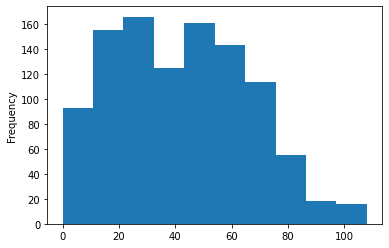

In [129]:
patients_data["AGE"].plot.hist()